In [1]:
base_url = "..//dataset//"

# Loading libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import seaborn as sns
import scipy.stats as stat
import pylab 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import joblib
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import scipy.stats as stat
import pylab 

In [3]:
from sklearn.metrics import roc_auc_score, roc_curve

# Agenda:

1. Get optimal threshold for doing classification
2. Clustering (Skipping for now as already getting very good results)
3. Test different models
4. Hyperparameter Tuning

# Loading the Data

In [4]:
df = pd.read_csv(base_url+'phishing_full.csv')

In [5]:
top_features = ['directory_length', 'time_domain_activation', 'length_url',
       'file_length', 'qty_slash_url', 'qty_plus_directory', 'domain_length',
       'qty_vowels_domain', 'qty_asterisk_directory', 'qty_hyphen_directory',
       'qty_dot_domain', 'qty_underline_directory', 'qty_percent_directory',
       'qty_dot_url', 'qty_hyphen_url', 'qty_hyphen_file', 'qty_hyphen_domain',
       'params_length', 'qty_underline_url', 'qty_tld_url', 'qty_plus_params',
       'qty_percent_url', 'qty_equal_params', 'qty_dot_params',
       'qty_percent_params', 'qty_underline_params']
top_features.append('phishing')

In [6]:
df = df[top_features]

In [7]:
df

,directory_length,time_domain_activation,length_url,file_length,qty_slash_url,qty_plus_directory,domain_length,qty_vowels_domain,qty_asterisk_directory,qty_hyphen_directory,qty_dot_domain,qty_underline_directory,qty_percent_directory,qty_dot_url,qty_hyphen_url,qty_hyphen_file,qty_hyphen_domain,params_length,qty_underline_url,qty_tld_url,qty_plus_params,qty_percent_url,qty_equal_params,qty_dot_params,qty_percent_params,qty_underline_params,phishing
0,8,-1,25,7,1,0,17,4,0,0,2,0,0,3,0,0,0,-1,0,1,-1,0,-1,-1,-1,-1,1
1,42,579,223,9,3,0,16,5,0,0,2,0,0,5,0,0,0,165,1,3,0,0,3,0,0,1,1
2,1,-1,15,0,1,0,14,3,0,0,2,0,0,2,0,0,0,-1,0,1,-1,0,-1,-1,-1,-1,0
3,62,-1,81,9,5,0,19,7,0,0,2,2,0,4,0,0,0,-1,2,1,-1,0,-1,-1,-1,-1,1
4,-1,6998,19,-1,0,-1,19,5,-1,-1,2,-1,-1,2,0,-1,0,-1,0,1,-1,0,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,-1,5509,23,-1,0,-1,23,5,-1,-1,3,-1,-1,3,1,-1,1,-1,0,2,-1,0,-1,-1,-1,-1,0
88643,-1,5046,34,-1,0,-1,34,14,-1,-1,2,-1,-1,2,0,-1,0,-1,0,1,-1,0,-1,-1,-1,-1,0
88644,48,1844,70,11,5,0,22,6,0,1,1,0,0,2,1,0,0,-1,0,1,-1,0,-1,-1,-1,-1,1
88645,1,-1,28,0,1,0,27,5,0,0,2,0,0,2,0,0,0,-1,0,1,-1,0,-1,-1,-1,-1,1


# Transformation Classes

In [8]:
import scipy.stats as stat
import pylab 

class box_cox_transformation(BaseEstimator, TransformerMixin):
    
    def __init__(self, features, flag=False):
        self.features = features
        self.flag = flag
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X,y=None):
        #df = X.copy()
        if not self.flag:
            return X
        
        for feature in self.features:
            try:
                # Apply box cox transformations
                X[feature], parameter = stat.boxcox(X[feature])
                print(X[feature])
            except:
                pass
        return X
            
        

In [9]:
preprocess_pipeline = joblib.load('preprocess_pipeline.joblib')

c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator SimpleImputer from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Det

In [10]:
preprocess_pipeline

Pipeline(steps=[('imputer',
                 SimpleImputer(strategy='median', verbose='deprecated')),
                ('box_cox_transformation',
                 box_cox_transformation(features=['length_url'])),
                ('std_scaler', StandardScaler())])

# Create Train and Test Data (Using stratified Shuffle Split)

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(df, df['phishing']):
    X_train = df.loc[train_index]
    X_test = df.loc[test_index]
X_train, y_train = X_train.drop(['phishing'],axis = 1),X_train['phishing']
X_test, y_test = X_test.drop(['phishing'],axis = 1),X_test['phishing']

# Preprocessing

In [12]:
X_train = preprocess_pipeline.fit_transform(X_train)

In [13]:
X_test = preprocess_pipeline.transform(X_test)

# Selecting correct threshold

In this problem:

False Positive: Domain is not phishing but model predicted phishing

False Negative: Domain is phishing but model predicted not phishing

<strong>Clearly False Negatives are very deadly in this scenario. So I'll optimize the False Negatives and try to increase the recall</strong>

#### Using Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [15]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
train_pred = rf_model.predict_proba(X_train)

In [17]:
print('RF train roc-auc score: {}'.format(roc_auc_score(y_train,train_pred[:,1])))

RF train roc-auc score: 0.998884766622175


In [18]:
# we only need the probabilities of class 1

#### Using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000)

In [20]:
lr_model.fit(X_train,y_train)
train_pred = lr_model.predict_proba(X_train)

In [21]:
print('LR train roc-auc score: {}'.format(roc_auc_score(y_train,train_pred[:,1])))

LR train roc-auc score: 0.975619792933967


#### Using Ada Boost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()

In [23]:
ada_model.fit(X_train,y_train)
train_pred = ada_model.predict_proba(X_train)

In [24]:
print('ADA train roc-auc score: {}'.format(roc_auc_score(y_train,train_pred[:,1])))

ADA train roc-auc score: 0.9819433151064779


#### Using KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [26]:
knn_model.fit(X_train,y_train)
train_pred = knn_model.predict_proba(X_train)

In [27]:
print('KNN train roc-auc score: {}'.format(roc_auc_score(y_train,train_pred[:,1])))

KNN train roc-auc score: 0.9920205675372331


#### Now selecting the best threshold

In [28]:
pred = []
for model in [rf_model, lr_model,ada_model, knn_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))

In [29]:
final_pred = pd.concat(pred,axis = 1)

In [30]:
final_pred

,0,1,2,3
0,0.910000,0.903415,0.510341,1.0
1,0.000000,0.010711,0.475140,0.0
2,0.880000,0.977917,0.523289,1.0
3,0.000000,0.002060,0.460565,0.0
4,1.000000,0.999999,0.542273,1.0
...,...,...,...,...
17725,0.000000,0.002321,0.460565,0.0
17726,0.950000,0.936900,0.509331,1.0
17727,0.045536,0.019465,0.489351,0.0
17728,0.320000,0.226252,0.497768,0.4


In [31]:
final_pred = pd.concat(pred,axis = 1).mean(axis=1)

In [32]:
final_pred

0        0.830939
1        0.121463
2        0.845301
3        0.115656
4        0.885568
           ...   
17725    0.115721
17726    0.849058
17727    0.138588
17728    0.361005
17729    0.889946
Length: 17730, dtype: float64

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, final_pred)

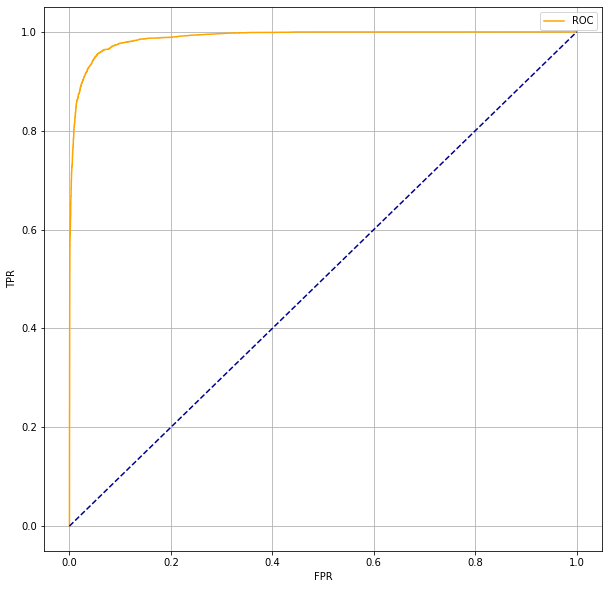

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, final_pred)
figure = plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.grid()
plt.show()


In [35]:
from sklearn.metrics import precision_recall_curve

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test,final_pred)


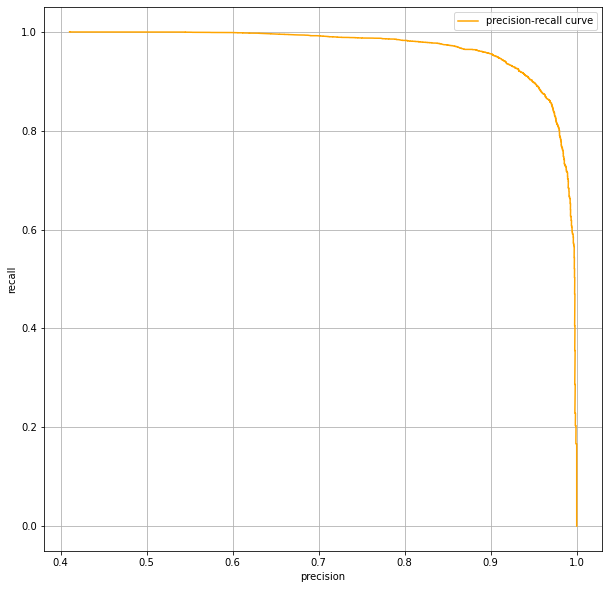

In [37]:
figure = plt.figure(figsize=(10,10))
plt.plot(precision, recall, color='orange', label='precision-recall curve')
#plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend()
plt.grid()
plt.show()

## There is a steep fall in recall at 0.85 precision. We can select that threshold

In [38]:
def get_threshold_with_precision(precisions, thresholds, min_desired_precision):
    for index, precision in enumerate(precisions):
        if precision>=min_desired_precision:
            return thresholds[index]

In [39]:
get_threshold_with_precision(precision,thresholds,0.85)

0.3082419601684291

## We will use 0.3 as the threshold so that recall is high and False Negatives can be reduced

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
rf = RandomForestClassifier()

In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier()

#### Clearly False Negatives are quite less

### With 0.5 as threshold

In [43]:
predictions = rf.predict(X_test)

In [44]:
confusion_matrix(y_test,predictions)

array([[11182,   418],
       [  397,  5733]], dtype=int64)

### With custom threshold

In [45]:
probalities = rf.predict_proba(X_test)[:,1]

In [46]:
predictions = np.where(probalities>0.3,1,0)

In [47]:
confusion_matrix(y_test,predictions)

array([[10896,   704],
       [  231,  5899]], dtype=int64)

### Here: 

1. TN: 10908
2. TP: 5898
3. FP: 692
4. FN: 232

## Clearly with this threshold, we have reduced the False Negatives

In [48]:
custom_threshold = 0.3

# Testing Different models

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression(max_iter=10000)

In [51]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [52]:
predictions = lr.predict_proba(X_test)[:,1]

In [53]:
predictions = np.where(predictions>custom_threshold,1,0)

In [54]:
confusion_matrix(y_test,predictions)

array([[10319,  1281],
       [  316,  5814]], dtype=int64)

In [55]:
roc_auc_score(y_test,predictions)

0.9190096051077234

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     11600
           1       0.82      0.95      0.88      6130

    accuracy                           0.91     17730
   macro avg       0.89      0.92      0.90     17730
weighted avg       0.92      0.91      0.91     17730



#### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
predictions = knn.predict_proba(X_test)[:,1]

In [61]:
predictions = np.where(predictions>custom_threshold,1,0)

In [62]:
confusion_matrix(y_test,predictions)

array([[10868,   732],
       [  326,  5804]], dtype=int64)

In [63]:
roc_auc_score(y_test,predictions)

0.9418577375260166

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     11600
           1       0.89      0.95      0.92      6130

    accuracy                           0.94     17730
   macro avg       0.93      0.94      0.94     17730
weighted avg       0.94      0.94      0.94     17730



#### Random Forest

In [65]:
rf = RandomForestClassifier()

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [67]:
predictions = rf.predict_proba(X_test)[:,1]

In [68]:
predictions = np.where(predictions>custom_threshold,1,0)

In [69]:
confusion_matrix(y_test,predictions)

array([[10903,   697],
       [  234,  5896]], dtype=int64)

In [70]:
roc_auc_score(y_test,predictions)

0.9508704365190978

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     11600
           1       0.89      0.96      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.94      0.95      0.94     17730
weighted avg       0.95      0.95      0.95     17730



#### Extra Trees Classifier

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

In [73]:
extra = ExtraTreesClassifier()

In [74]:
extra.fit(X_train,y_train)

ExtraTreesClassifier()

In [75]:
predictions = extra.predict_proba(X_test)[:,1]

In [76]:
predictions = np.where(predictions>custom_threshold,1,0)

In [77]:
confusion_matrix(y_test,predictions)

array([[10905,   695],
       [  241,  5889]], dtype=int64)

In [78]:
roc_auc_score(y_test,predictions)

0.950385680936041

In [79]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     11600
           1       0.89      0.96      0.93      6130

    accuracy                           0.95     17730
   macro avg       0.94      0.95      0.94     17730
weighted avg       0.95      0.95      0.95     17730



#### Ada Boost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
ada = AdaBoostClassifier()

In [82]:
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [83]:
predictions = ada.predict_proba(X_test)[:,1]

In [84]:
predictions = np.where(predictions>custom_threshold,1,0)

In [85]:
confusion_matrix(y_test,predictions)

array([[    0, 11600],
       [    0,  6130]], dtype=int64)

In [86]:
roc_auc_score(y_test,predictions)

0.5

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11600
           1       0.35      1.00      0.51      6130

    accuracy                           0.35     17730
   macro avg       0.17      0.50      0.26     17730
weighted avg       0.12      0.35      0.18     17730



c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are

#### Gradient Boost

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gradient_clf = GradientBoostingClassifier()

In [90]:
gradient_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [91]:
predictions = gradient_clf.predict_proba(X_test)[:,1]

In [92]:
predictions = np.where(predictions>custom_threshold,1,0)

In [93]:
confusion_matrix(y_test,predictions)

array([[10578,  1022],
       [  198,  5932]], dtype=int64)

In [94]:
roc_auc_score(y_test,predictions)

0.9397981942960006

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     11600
           1       0.85      0.97      0.91      6130

    accuracy                           0.93     17730
   macro avg       0.92      0.94      0.93     17730
weighted avg       0.94      0.93      0.93     17730



#### Naive Bayes

In [96]:
from sklearn.naive_bayes import GaussianNB

In [97]:
nb = GaussianNB()

In [98]:
nb.fit(X_train,y_train)

GaussianNB()

In [99]:
predictions = nb.predict_proba(X_test)[:,1]

In [100]:
predictions = np.where(predictions > custom_threshold,1,0)

In [101]:
predictions

array([0, 0, 1, ..., 1, 0, 1])

In [102]:
confusion_matrix(y_test,predictions)

array([[11078,   522],
       [ 2632,  3498]], dtype=int64)

In [103]:
roc_auc_score(y_test,predictions)

0.7628181076672104

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     11600
           1       0.87      0.57      0.69      6130

    accuracy                           0.82     17730
   macro avg       0.84      0.76      0.78     17730
weighted avg       0.83      0.82      0.81     17730



#### XG Boost

In [105]:
from xgboost import XGBClassifier

In [106]:
xgb = XGBClassifier()

In [107]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [108]:
predictions = xgb.predict_proba(X_test)[:,1]

In [109]:
predictions = np.where(predictions>custom_threshold,1,0)

In [110]:
confusion_matrix(y_test,predictions)

array([[10836,   764],
       [  222,  5908]], dtype=int64)

In [111]:
roc_auc_score(y_test,predictions)

0.9489612983068009

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     11600
           1       0.89      0.96      0.92      6130

    accuracy                           0.94     17730
   macro avg       0.93      0.95      0.94     17730
weighted avg       0.95      0.94      0.94     17730



#### XGBRF classifier

In [113]:
from xgboost import XGBRFClassifier

In [114]:
xgbrf = XGBRFClassifier()

In [115]:
xgbrf.fit(X_train,y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

In [116]:
predictions = xgbrf.predict_proba(X_test)[:,1]

In [117]:
predictions = np.where(predictions>custom_threshold,1,0)

In [118]:
confusion_matrix(y_test,predictions)

array([[10432,  1168],
       [  182,  5948]], dtype=int64)

In [119]:
roc_auc_score(y_test,predictions)

0.9348101479439725

In [120]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     11600
           1       0.84      0.97      0.90      6130

    accuracy                           0.92     17730
   macro avg       0.91      0.93      0.92     17730
weighted avg       0.93      0.92      0.93     17730



# On high level testing, Random Forests and XG Boost seem to be giving best results

# Hyperparameter tuning

In [121]:
rf = RandomForestClassifier()

In [122]:
parameters = {
    'n_estimators':[100,200,500,1000],
    'criterion':["gini", "entropy", "log_loss"],
    'min_samples_split':[2,4,6],
    'max_features':['int','sqrt','log2'],
    'bootstrap':[True,False],
    
}

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
grid = GridSearchCV(rf, parameters,cv=3,verbose=10,n_jobs=-1, scoring='recall')

In [125]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rachi\Desktop\inueuron\PERSONAL PROJECTS\Phishing-Domain-Detection-using-Machine-Learning\venv\lib\site-packages\sklearn\ensemble\_f

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['int', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='recall', verbose=10)

In [126]:
best_estimator = grid.best_estimator_

In [127]:
predictions = best_estimator.predict_proba(X_test)[:,1]

In [128]:
predictions = np.where(predictions>custom_threshold,1,0)

In [129]:
confusion_matrix(y_test,predictions)

array([[10837,   763],
       [  215,  5915]], dtype=int64)

In [130]:
roc_auc_score(y_test,predictions)

0.9495753642346854

In [131]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     11600
           1       0.89      0.96      0.92      6130

    accuracy                           0.94     17730
   macro avg       0.93      0.95      0.94     17730
weighted avg       0.95      0.94      0.95     17730



In [132]:
best_estimator

RandomForestClassifier(max_features='log2', min_samples_split=6,
                       n_estimators=500)

## We will use this estimator

estimator: RandomForestClassifier <br>
max_features: log2 <br>
min_samples_split : 6 <br>
n_estimators: 500


### Let's just see on training dataset as well

In [133]:
predictions_train = best_estimator.predict_proba(X_train)[:,1]

In [134]:
predictions_train = np.where(predictions_train>custom_threshold,1,0)

In [135]:
confusion_matrix(y_train,predictions_train)

array([[44356,  2044],
       [  297, 24220]], dtype=int64)

In [136]:
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     46400
           1       0.92      0.99      0.95     24517

    accuracy                           0.97     70917
   macro avg       0.96      0.97      0.96     70917
weighted avg       0.97      0.97      0.97     70917

